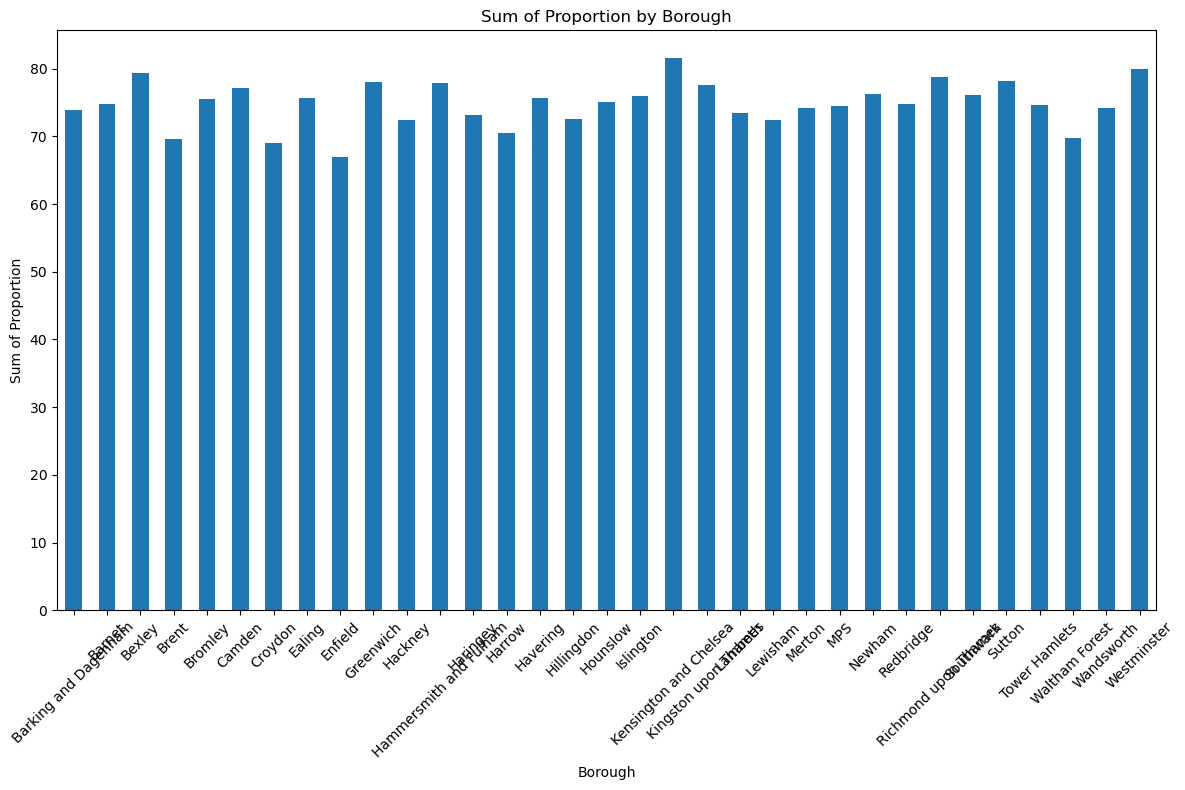

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
  
gran = pd.read_excel('qwe/Gran.xlsx', header=3)
gran.head(100)

# Set 'Row Labels' as the index for better plotting
gran.set_index('Row Labels', inplace=True)

if 'Grand Total' in gran.index:
    gran.drop('Grand Total', inplace=True)

# Create a plot of the 'Sum of Proportion' column
plt.figure(figsize=(12, 8))
gran['Sum of Proportion'].plot(kind='bar')
plt.title('Sum of Proportion by Borough')
plt.xlabel('Borough')
plt.ylabel('Sum of Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2]:
uof = pd.read_excel('qwe/USE.xlsx')

gran = pd.read_excel('qwe/Gran.xlsx', header=3)

borough_to_proportion = gran.set_index('Row Labels')['Sum of Proportion'].to_dict()
uof['Sum of Proportion'] = uof['Borough'].map(borough_to_proportion)
columns_to_keep = ['Borough', 'SubjectAge', 'SubjectGender', 'SubjectEthnicity', 'Sum of Proportion'] + [col for col in uof.columns if col.startswith('Outcome')]
uof = uof[columns_to_keep]
uof.head()
print(uof.columns.tolist())

['Borough', 'SubjectAge', 'SubjectGender', 'SubjectEthnicity', 'Sum of Proportion', 'Outcome: Made off/escaped', 'Outcome: Arrested', 'Outcome: Hospitalised', 'Outcome: Detained - Mental Health Act', 'Outcome: Fatality', 'Outcome: Other', 'Outcome: No Further Action']


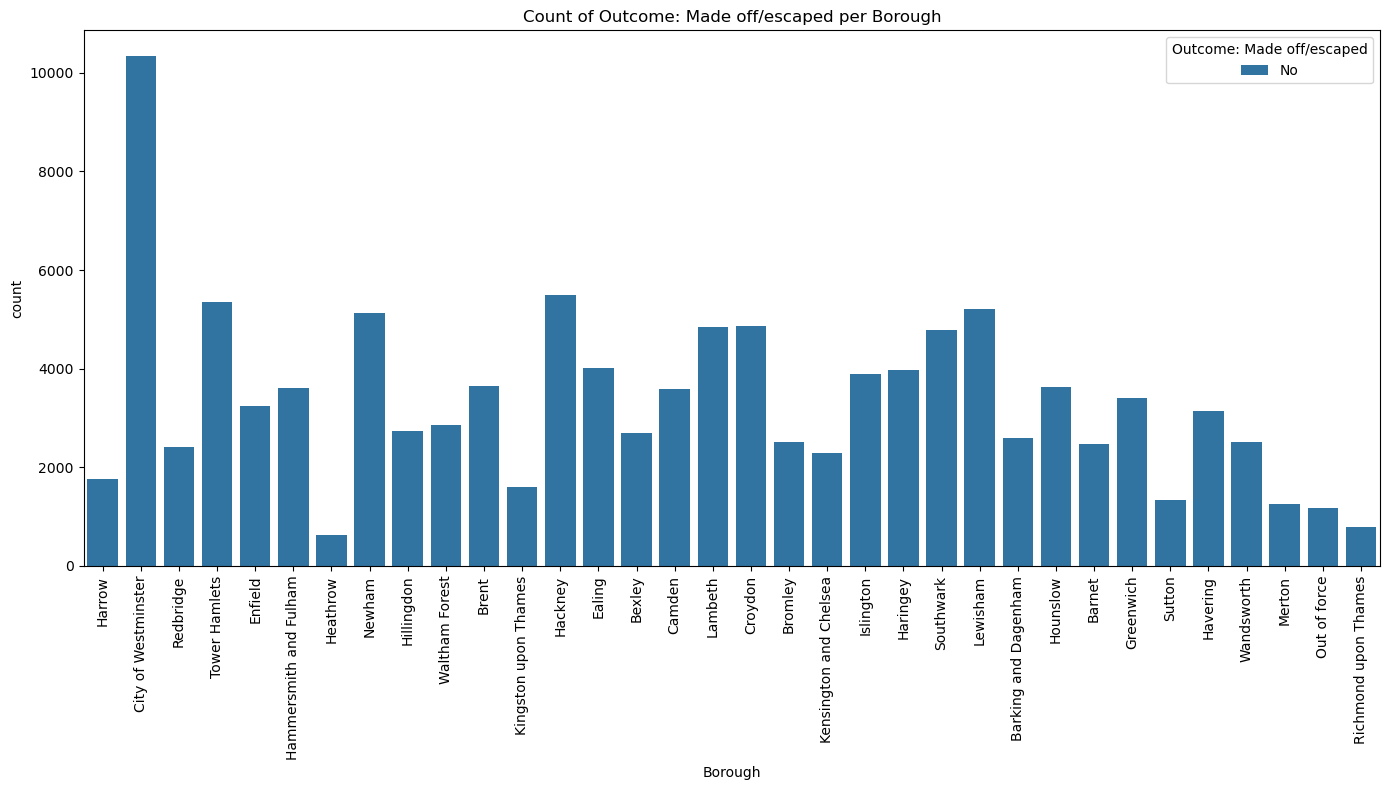

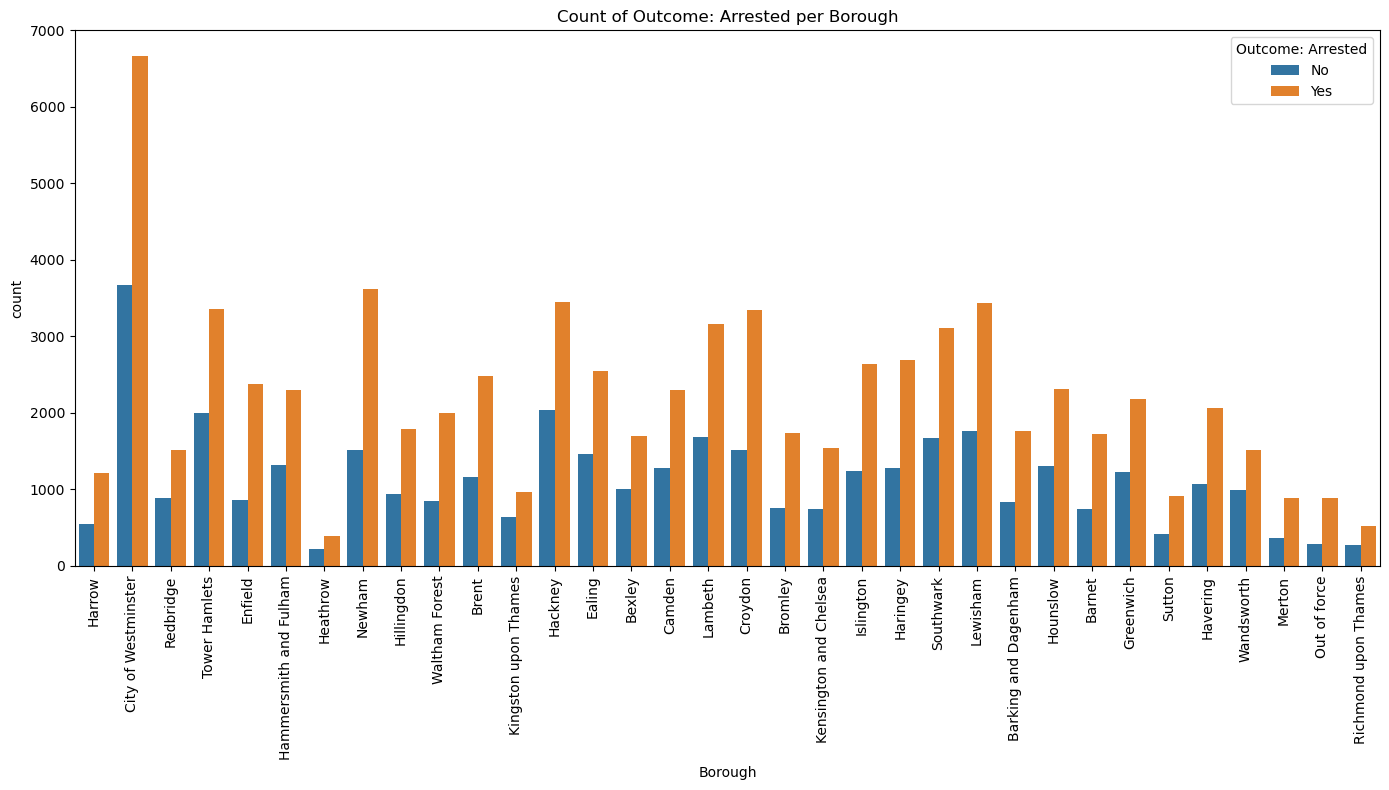

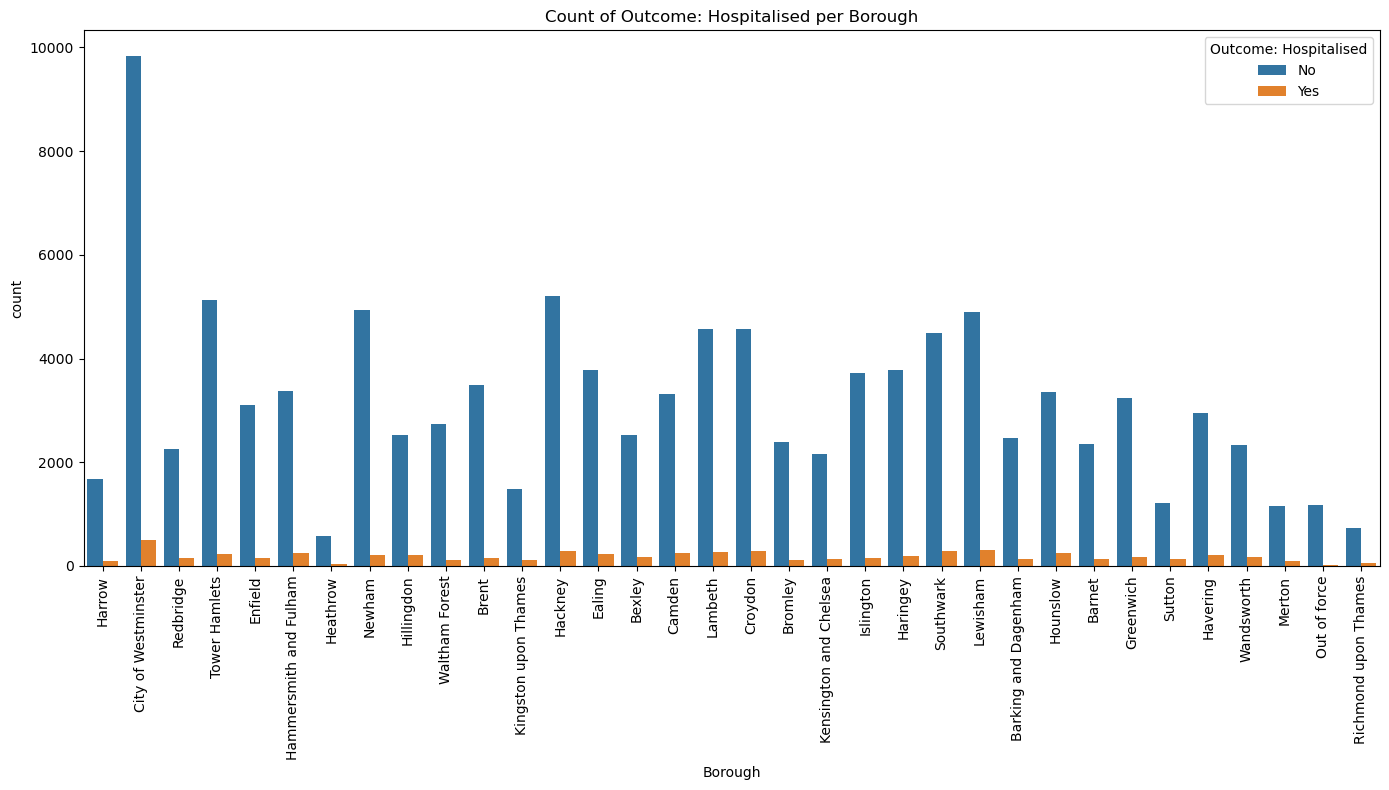

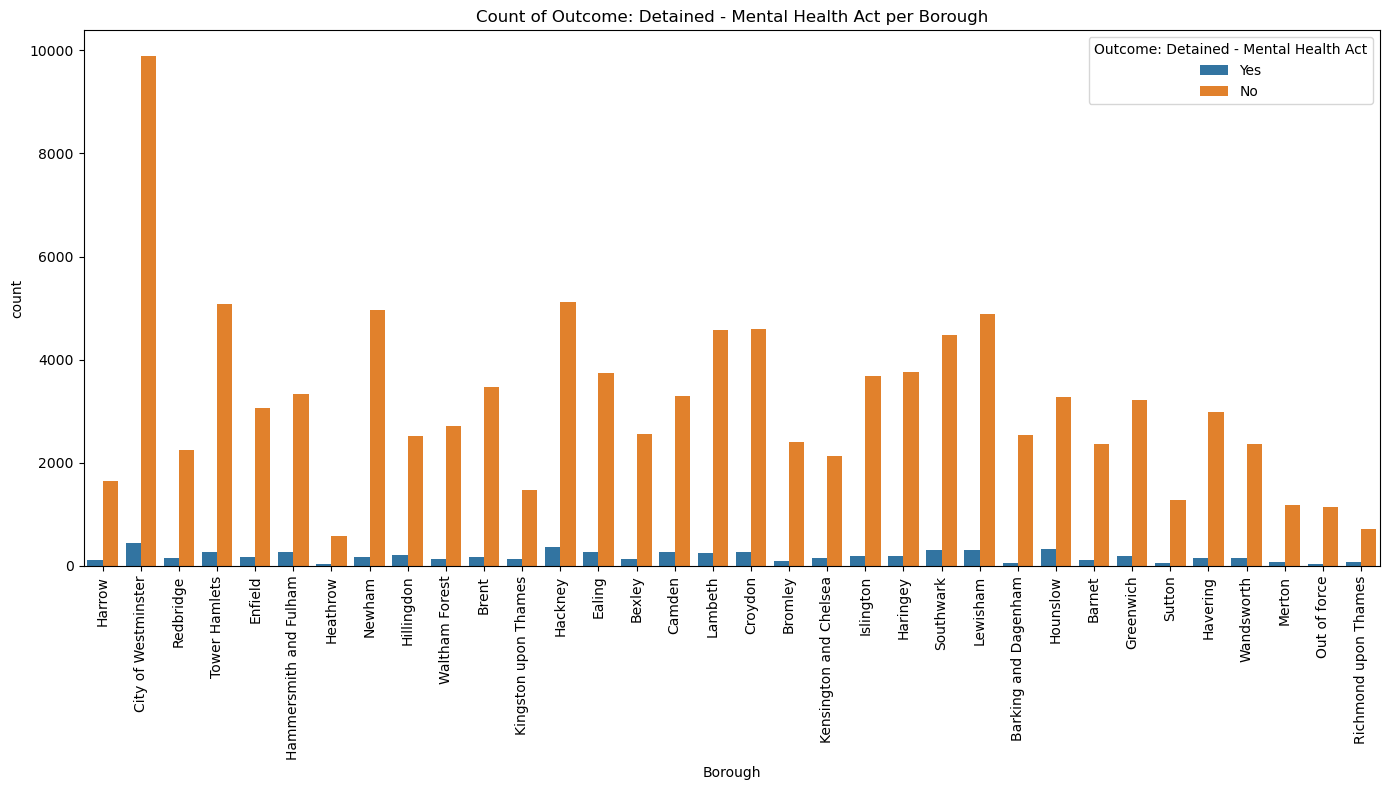

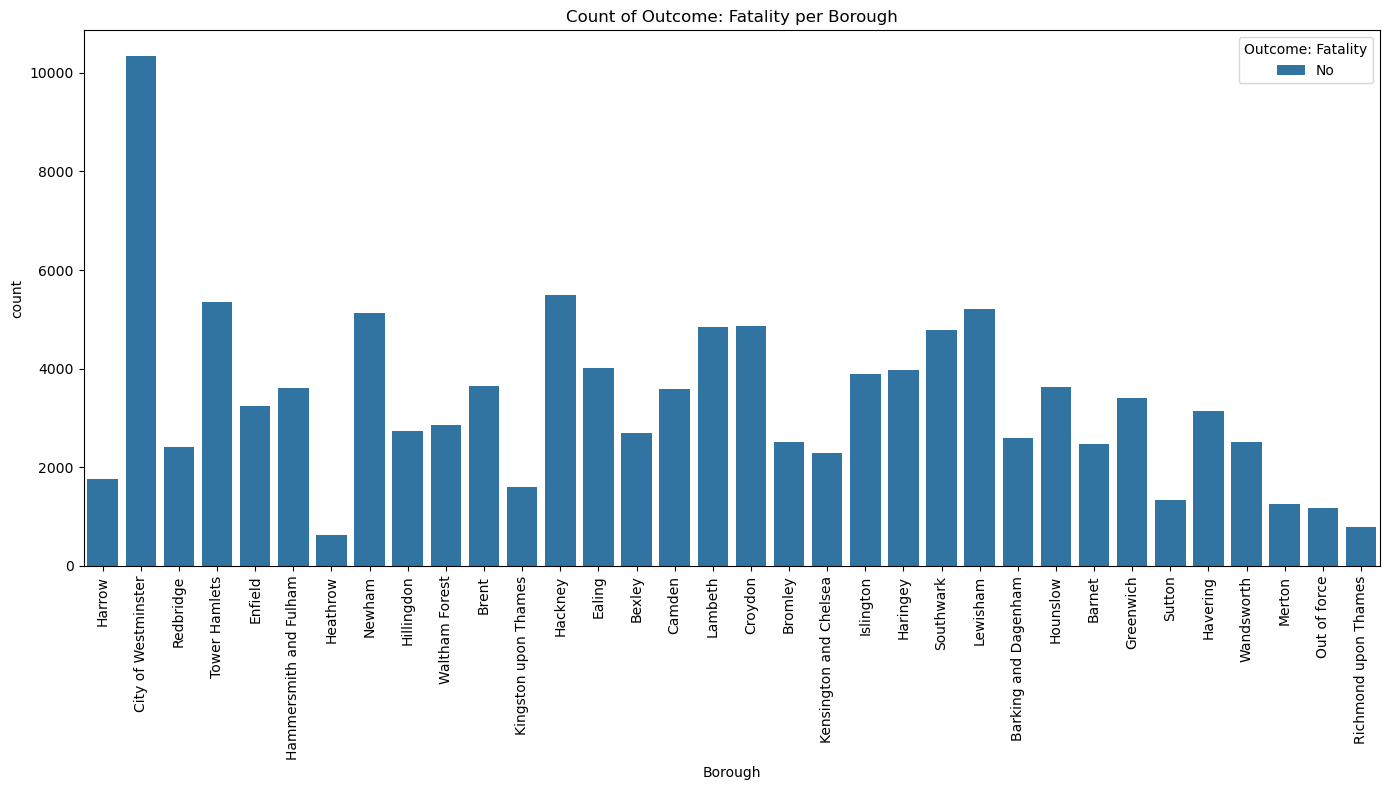

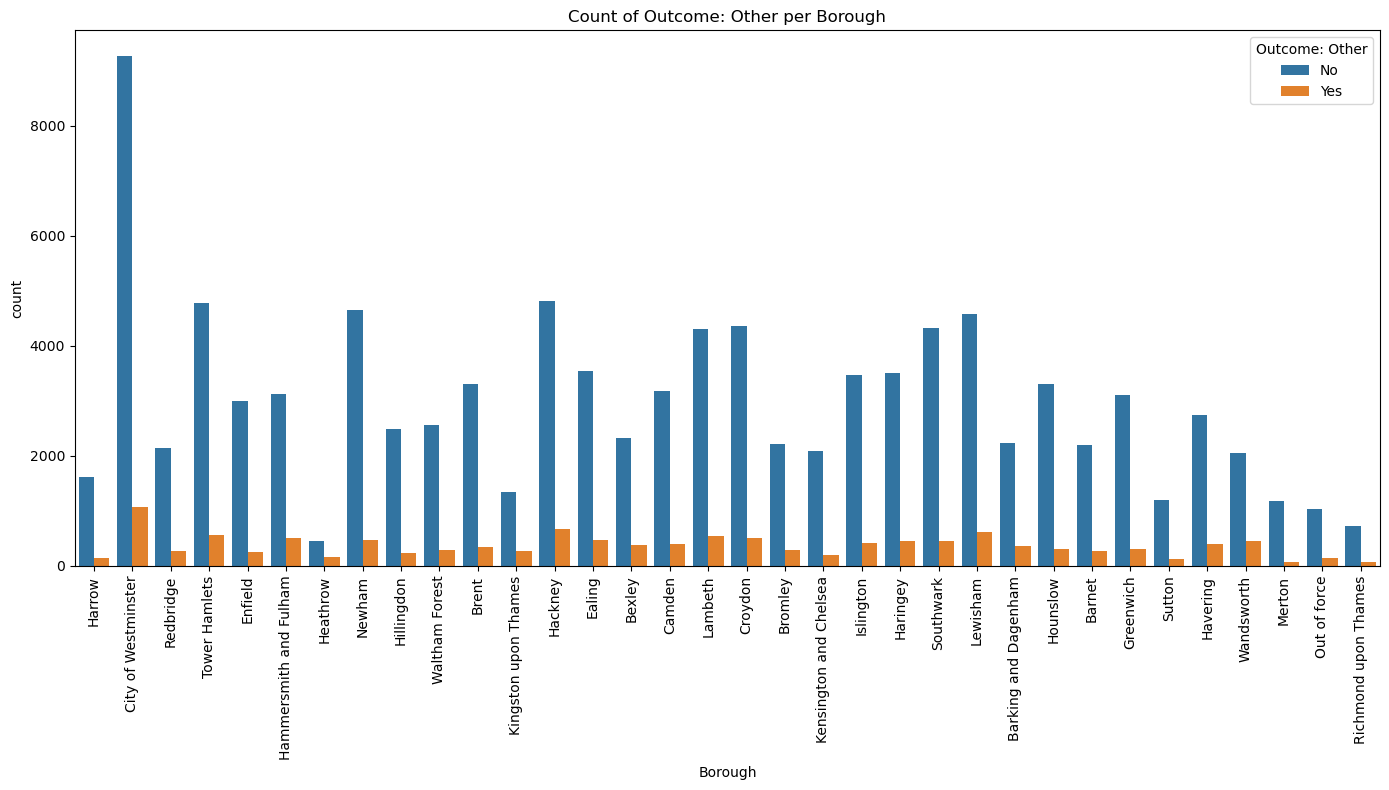

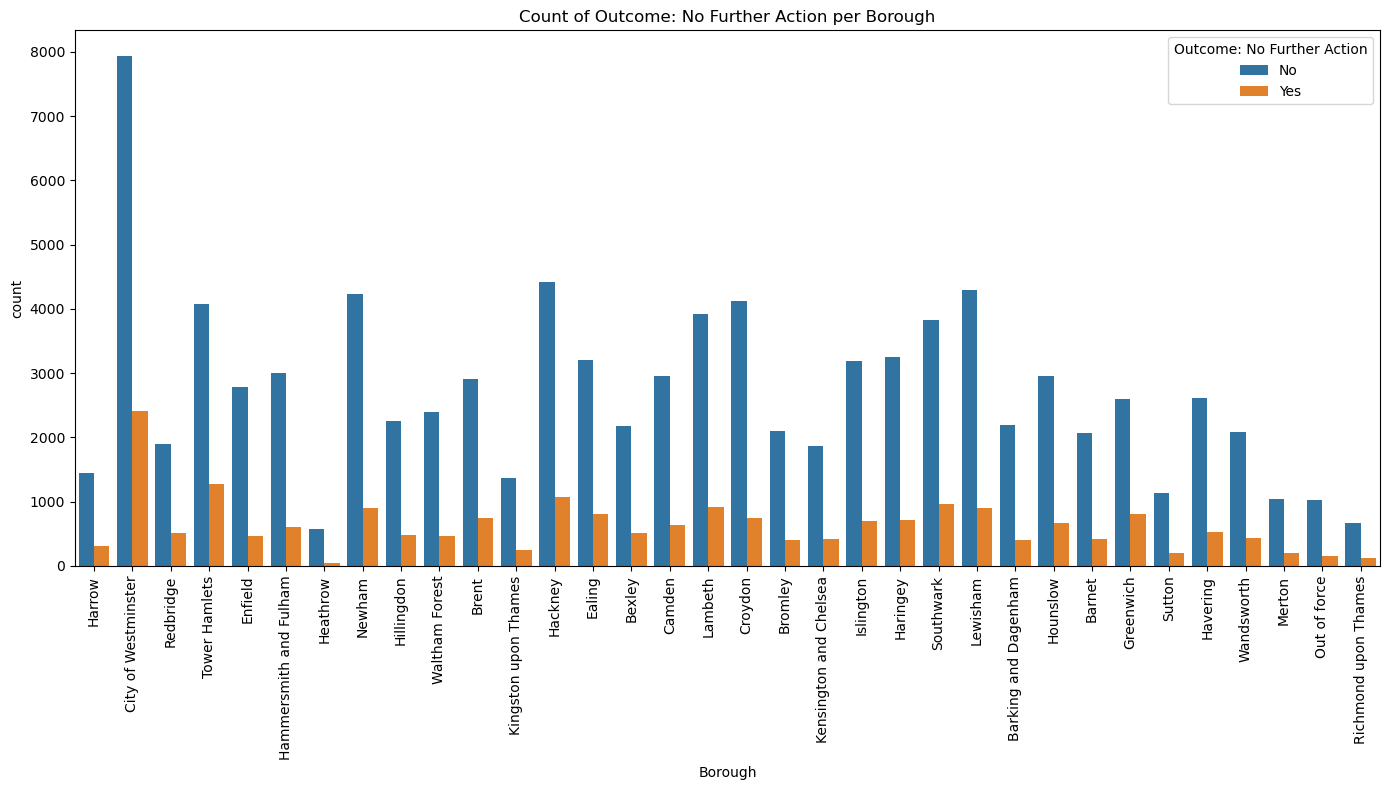

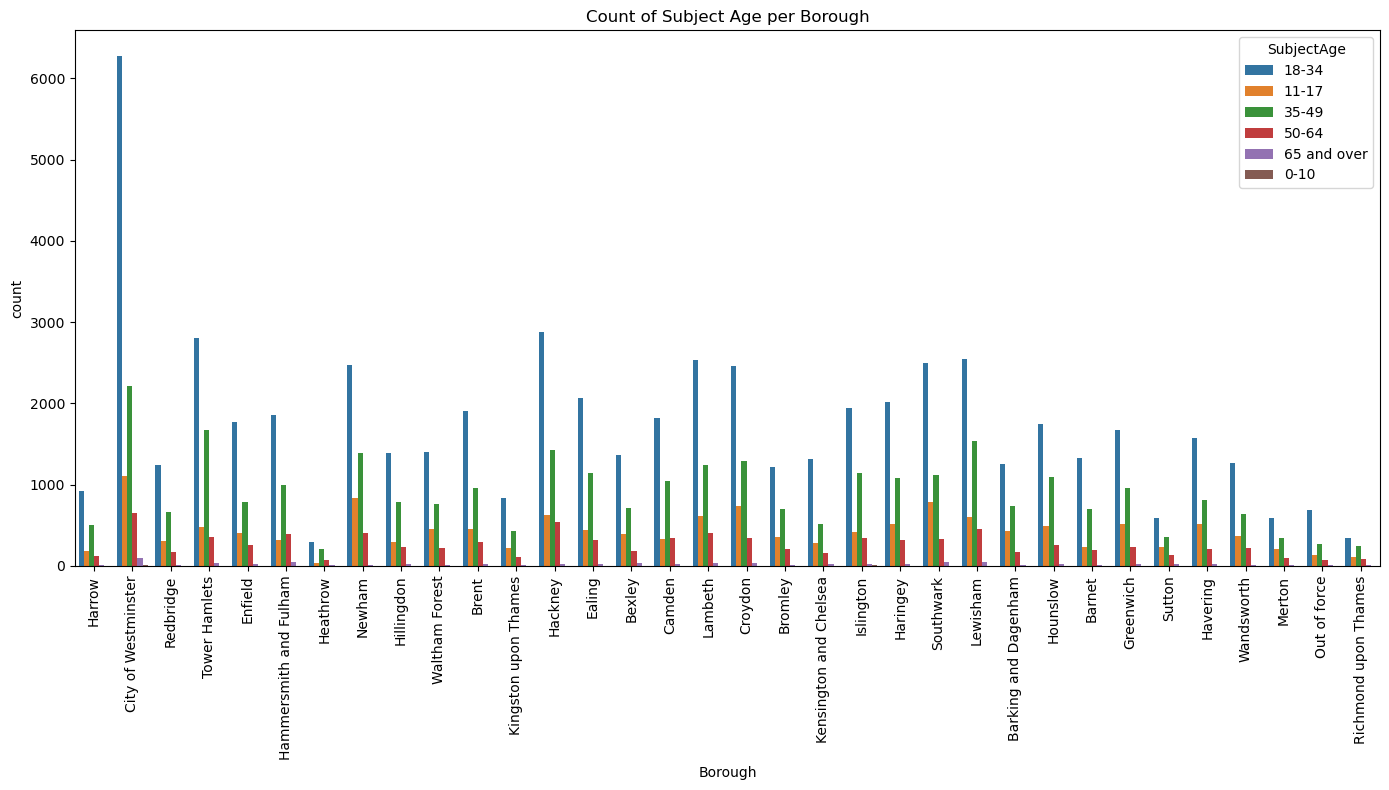

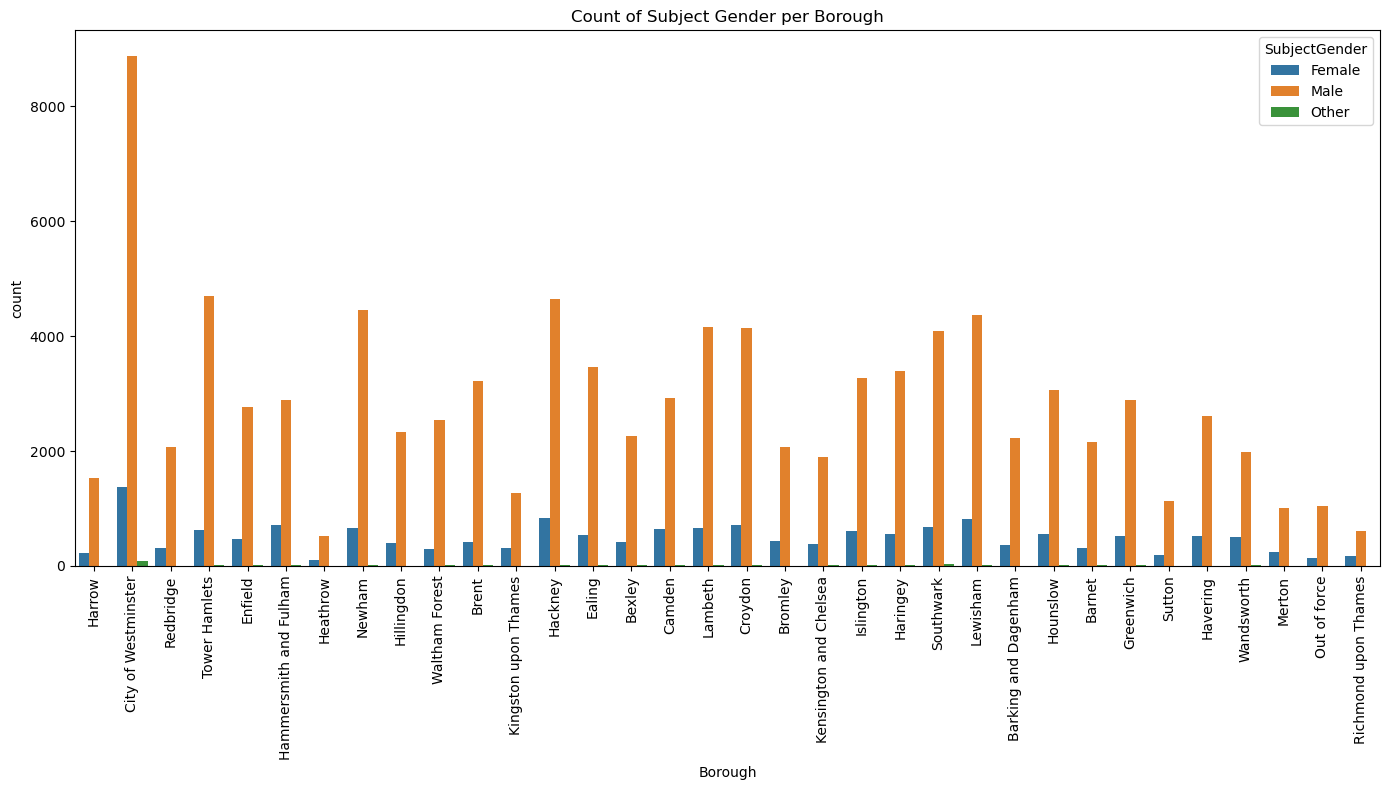

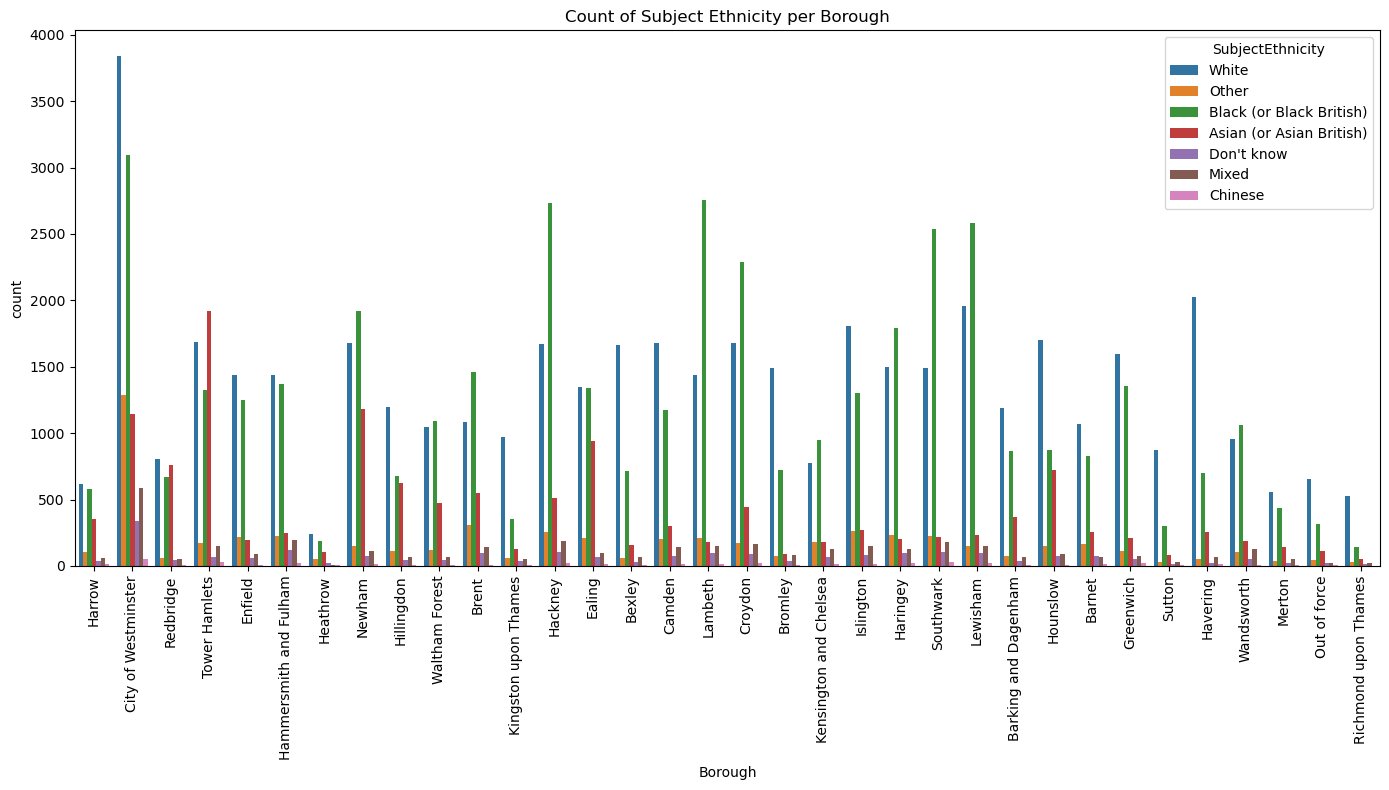

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_outcome_counts(df, column, title):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df, x='Borough', hue=column)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

outcome_columns = [col for col in uof.columns if col.startswith('Outcome')]
for outcome_col in outcome_columns:
    plot_outcome_counts(uof, outcome_col, f'Count of {outcome_col} per Borough')

def plot_demographic_counts(df, column, title):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df, x='Borough', hue=column)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_demographic_counts(uof, 'SubjectAge', 'Count of Subject Age per Borough')
plot_demographic_counts(uof, 'SubjectGender', 'Count of Subject Gender per Borough')
plot_demographic_counts(uof, 'SubjectEthnicity', 'Count of Subject Ethnicity per Borough')


In [4]:
pas = pd.read_csv('qwe/PAS.csv')
pas.head()

C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_6468\2201891491.py:1: DtypeWarning: Columns (10,11,12,13,17,24,33,34,46,47,48,49,50,51,52,53,59,60,61,64,65,66,67,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,107,108,109,110,112,113,114,115,116,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  pas = pd.read_csv('qwe/PAS.csv')


,Unnamed: 0,Week,interview_date,Quarter1.1,Quarter,MONTH,FinancialYear,BCU,Borough,Q1,...,WT_Q64,WT_Q64_B,WT_Q64_E,WT_Discrete,WT_Discrete_rebased,ReXQ135,ReQ136,ReNQ147,ReQ150,ReQ139
0,1,01/04/2020-05/04/2020,1.380534e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU11,Barking & Dagenham,3 years but less than 5 years,...,NaN,3.147059,3.147059,3.192990,3.143867,Male,25 to 34,White British,Heterosexual,Full time (31+ hours per week)
1,2,01/04/2020-05/04/2020,1.380516e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU10,Barnet,30 years or more,...,NaN,0.781933,0.781933,0.793345,0.781140,Female,55 to 64,Black,Heterosexual,Full time (31+ hours per week)
2,3,01/04/2020-05/04/2020,1.380508e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU10,Barnet,30 years or more,...,NaN,1.398138,1.398138,1.418544,1.396720,Male,65+,Other,"Non-Heterosexual (Gay, Lesbian, Bisexual, None...",Retired
3,4,01/04/2020-05/04/2020,1.380516e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU5,Bexley,10 years but less than 20 years,...,NaN,4.097724,4.097724,4.157529,4.093567,Female,55 to 64,White Other,Heterosexual,Full time (31+ hours per week)
4,5,01/04/2020-05/04/2020,1.380525e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU10,Brent,10 years but less than 20 years,...,NaN,1.778367,1.778367,1.804322,1.776563,Female,16 to 24,Asian,Refused,Student/full time education


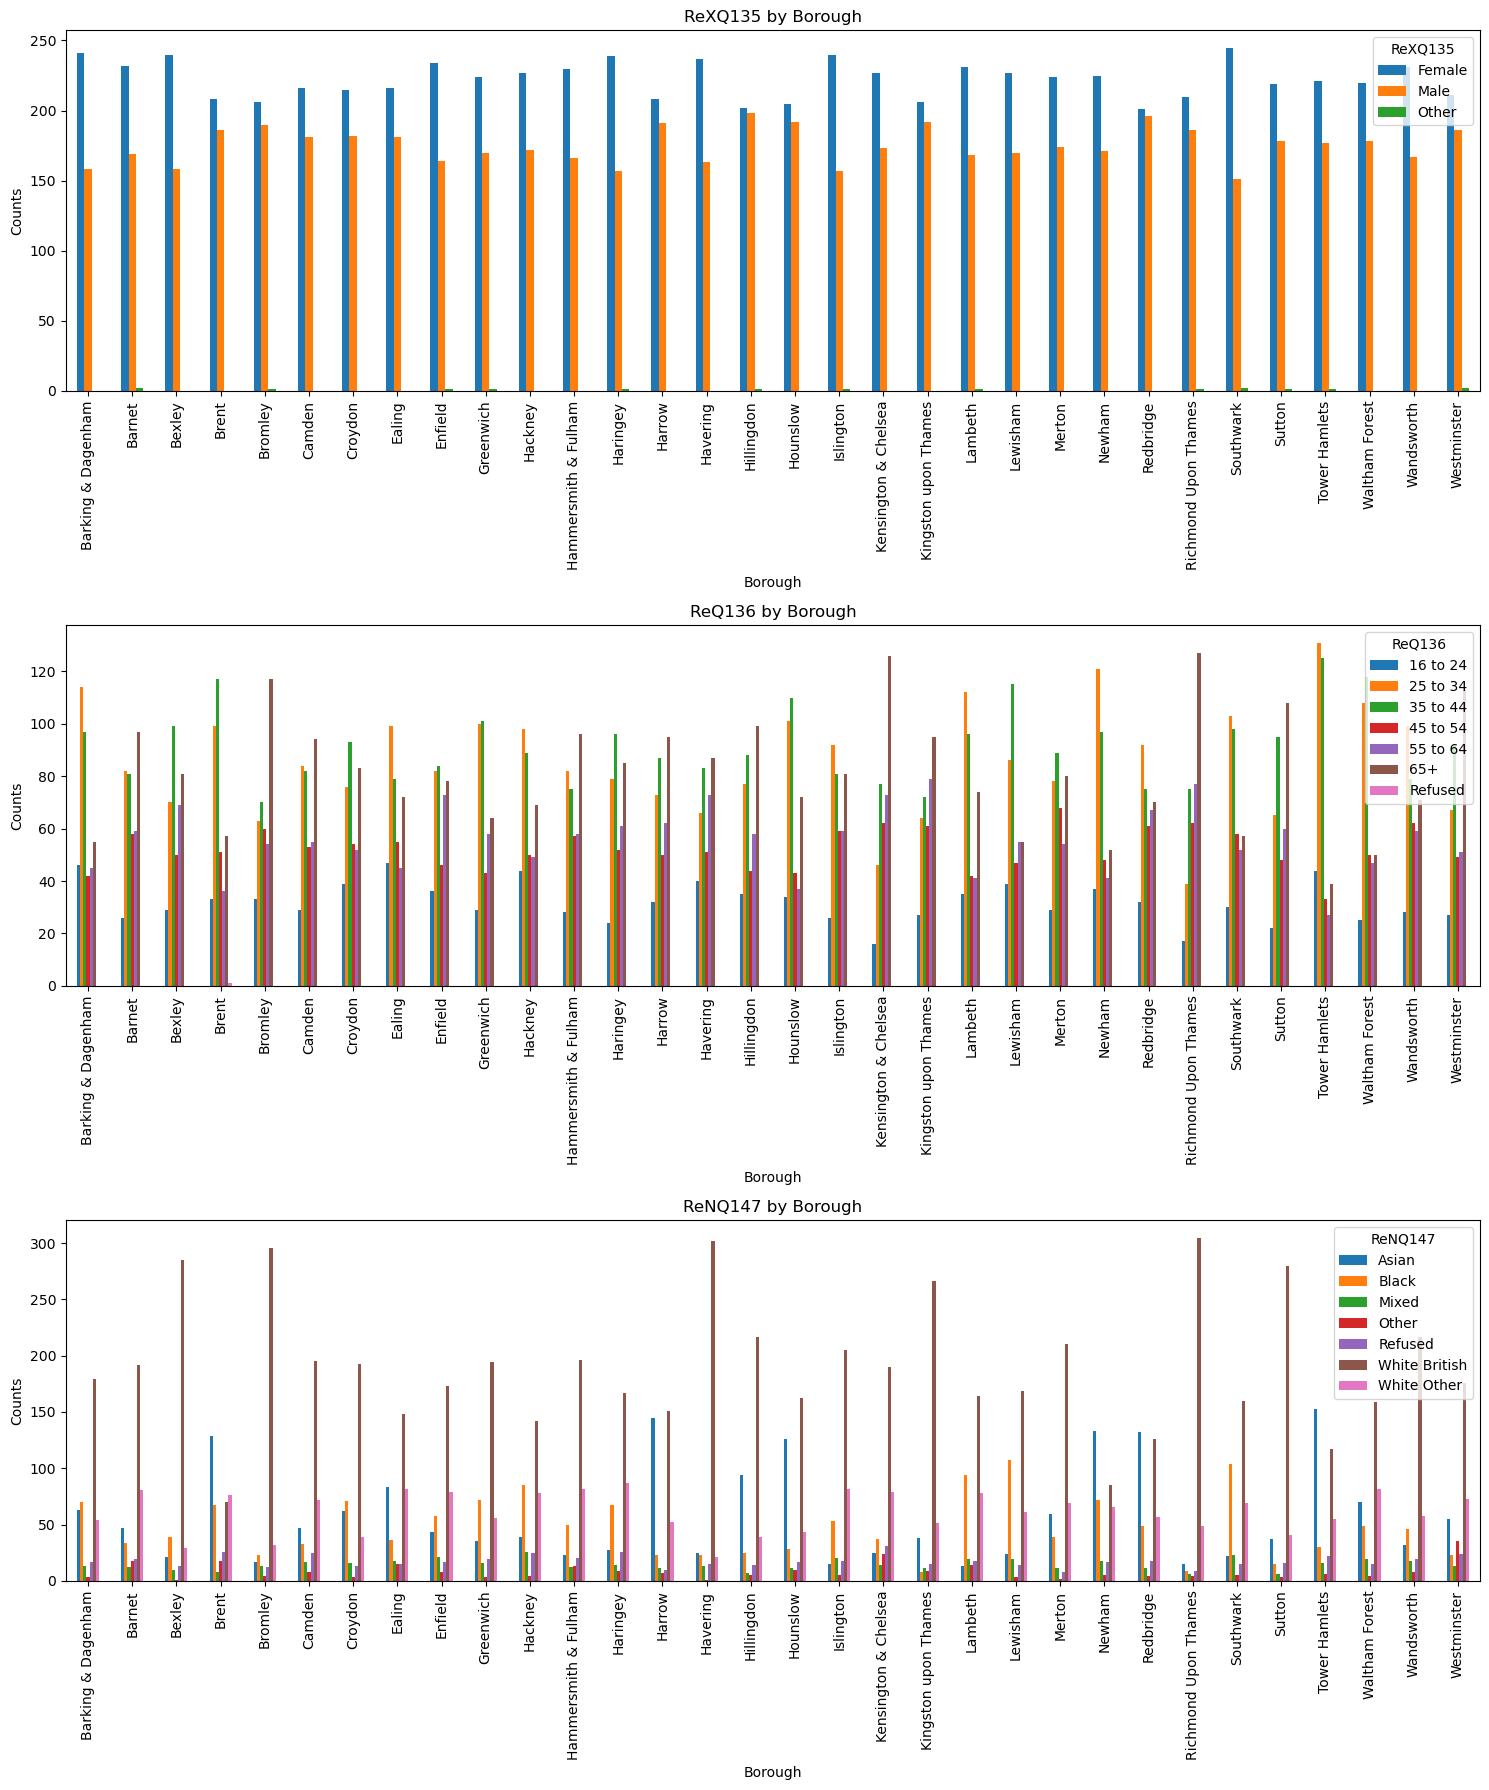

In [5]:


columns_to_keep = ['Borough', 'ReXQ135', 'ReQ136', 'ReNQ147']
pas_filtered = pas[columns_to_keep]

fig, ax = plt.subplots(3, 1, figsize=(15, 18))

pas_filtered.groupby('Borough')['ReXQ135'].value_counts().unstack().plot(kind='bar', ax=ax[0])
ax[0].set_title('ReXQ135 by Borough')
ax[0].set_ylabel('Counts')
ax[0].legend(title='ReXQ135')

pas_filtered.groupby('Borough')['ReQ136'].value_counts().unstack().plot(kind='bar', ax=ax[1])
ax[1].set_title('ReQ136 by Borough')
ax[1].set_ylabel('Counts')
ax[1].legend(title='ReQ136')

pas_filtered.groupby('Borough')['ReNQ147'].value_counts().unstack().plot(kind='bar', ax=ax[2])
ax[2].set_title('ReNQ147 by Borough')
ax[2].set_ylabel('Counts')
ax[2].legend(title='ReNQ147')

plt.tight_layout()
plt.show()

In [6]:
eth = pd.read_excel('qwe/eth.xls', header=1)
eth = eth.drop(eth.index[0])
eth = eth.drop(eth.index[0])
eth.reset_index(drop=True, inplace=True)
eth.columns.values[1] = 'Borough'
eth = eth.drop(eth.columns[0], axis=1)
eth.head()

,Borough,White,Asian,Black,Mixed/ Other,Total
0,Barking and Dagenham,99000,55000,51000,16000,222000
1,Barnet,255000,79000,28000,35000,398000
2,Bexley,188000,20000,28000,18000,254000
3,Brent,117000,138000,40000,37000,332000
4,Bromley,264000,25000,23000,25000,338000


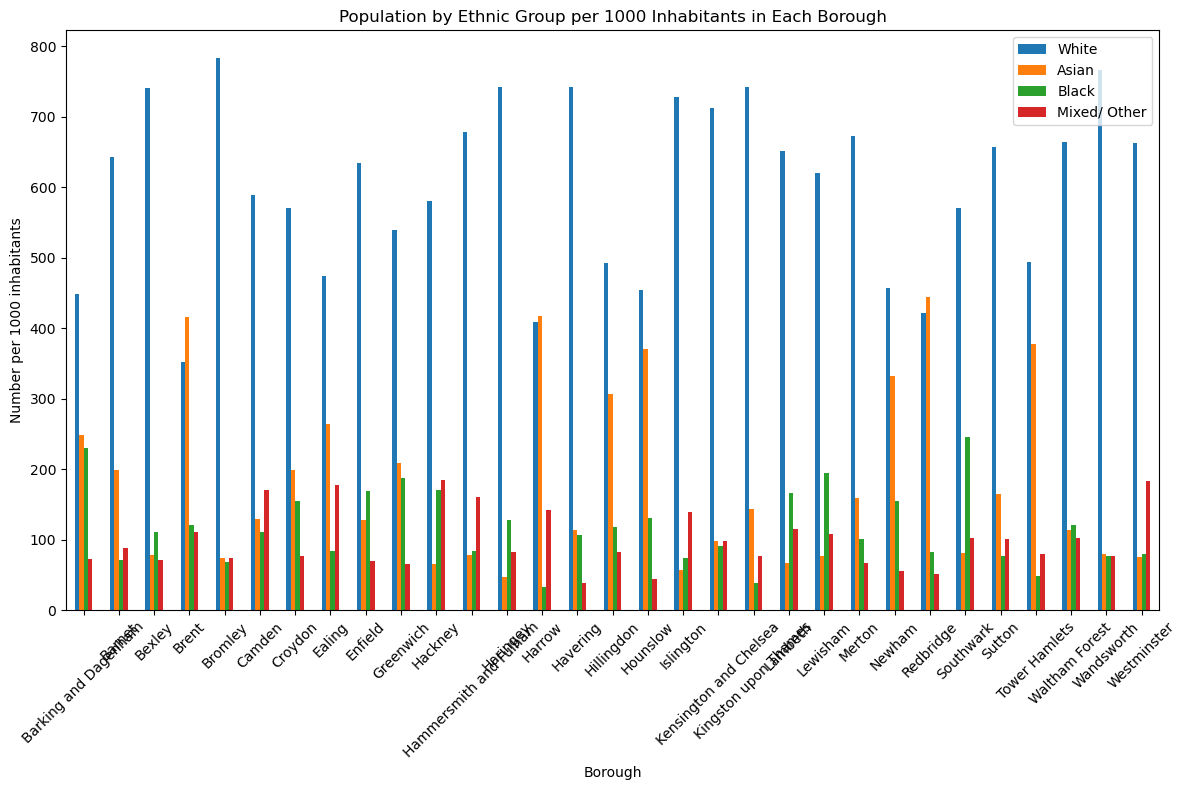

In [7]:
# Convert all columns except 'Borough' to numeric, errors='coerce' will set non-convertible values to NaN
for col in eth.columns[1:]:
    eth[col] = pd.to_numeric(eth[col], errors='coerce')

# Drop any rows that now contain NaN (optional, depends on your data needs)
eth.dropna(inplace=True)

# Group by 'Borough' and sum up all categories
grouped = eth.groupby('Borough').sum()

# Drop the 'Total' column if present to recalculate it
if 'Total' in grouped.columns:
    grouped.drop('Total', axis=1, inplace=True)

# Calculate total population per borough if it's not already calculated
grouped['Total'] = grouped.sum(axis=1)

# Normalize the data to per 1000 inhabitants
grouped_scaled = grouped.loc[:, grouped.columns != 'Total'].div(grouped['Total'], axis=0) * 1000

# Drop the 'Total' column before plotting
grouped_scaled.drop('Total', errors='ignore', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
grouped_scaled.plot(kind='bar', ax=ax)
ax.set_xlabel('Borough')
ax.set_ylabel('Number per 1000 inhabitants')
ax.set_title('Population by Ethnic Group per 1000 Inhabitants in Each Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()